Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [7]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')

In [12]:
# View the data types of the columns
movies_df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [16]:
# View the description of the dataset
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [19]:
# Drop/Remove redundant columns
movies_df = movies_df.drop(columns=['homepage','keywords','original_language','original_title','overview','production_companies','status','tagline'], axis=1)
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Remove any duplicate rows

In [25]:
# Extract the duplicated rows in the movies dataset
duplicates = movies_df[movies_df.duplicated() == 1]

# Remove/Drop the duplicated rows in the movies DataFrame
movies_df = movies_df.drop_duplicates()

In [28]:
# We view the shape of the dataframe
movies_df.shape

(4803, 12)

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [32]:
# Trace the missing values in each column
movies_df.isnull().sum()

budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [36]:
# Extract the rows with missing values
movies_df = movies_df.dropna(how='any')

# Review the shape of the dataframe
movies_df.shape

(4800, 12)

In [41]:
# Remove/Drop the rows with zeros in ['budget','revenue'] & keep the rows not equal to zero
movies_df = movies_df[(movies_df['budget']!=0) & (movies_df['revenue']!=0)]

In [43]:
# Count the frequency of values in 'budget'
movies_df['budget'].value_counts()

budget
20000000    126
25000000    115
30000000    114
40000000    111
15000000    107
           ... 
92620000      1
14600000      1
14800000      1
14500000      1
220000        1
Name: count, Length: 385, dtype: int64

In [45]:
# Count the frequency of values in 'revenue'
movies_df['revenue'].value_counts()

revenue
8000000      6
100000000    5
7000000      5
12000000     5
6000000      5
            ..
36893721     1
12342632     1
11087569     1
215000000    1
2040920      1
Name: count, Length: 3154, dtype: int64

The entries with zero budget and zero revenue have been successfully discarded from the dataframe.

We can also rellok at the shape and information of the datatypes after removal of null/missing values,
and zero budget/revenue entries from the dataframe.

In [54]:
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


In [56]:
# Relook at the shape
movies_df.shape

(3229, 12)

In [58]:
# We check the information on data types of each column
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3229 entries, 0 to 4798
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3229 non-null   int64  
 1   genres                3229 non-null   object 
 2   id                    3229 non-null   int64  
 3   popularity            3229 non-null   float64
 4   production_countries  3229 non-null   object 
 5   release_date          3229 non-null   object 
 6   revenue               3229 non-null   int64  
 7   runtime               3229 non-null   float64
 8   spoken_languages      3229 non-null   object 
 9   title                 3229 non-null   object 
 10  vote_average          3229 non-null   float64
 11  vote_count            3229 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 327.9+ KB


#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [65]:
# Change the release_date column to DateTime
import datetime
from datetime import date
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format='%Y-%m-%d')

# Extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year

# View the top five rows
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012


Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [69]:
# Converting budget and revenue columns into integer data type 'int64'
movies_df['budget'] = pd.to_numeric(movies_df['budget'])
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'])

# View data types of all the columns
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3229 entries, 0 to 4798
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3229 non-null   int64         
 1   genres                3229 non-null   object        
 2   id                    3229 non-null   int64         
 3   popularity            3229 non-null   float64       
 4   production_countries  3229 non-null   object        
 5   release_date          3229 non-null   datetime64[ns]
 6   revenue               3229 non-null   int64         
 7   runtime               3229 non-null   float64       
 8   spoken_languages      3229 non-null   object        
 9   title                 3229 non-null   object        
 10  vote_average          3229 non-null   float64       
 11  vote_count            3229 non-null   int64         
 12  release_year          3229 non-null   int32         
dtypes: datetime64[ns](1), f

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [72]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [74]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
1227,30000000,"['Comedy', 'Drama', 'Romance']",11431,9.965073,"['Germany', 'United States of America']",2005-04-06,50451307,103.0,"['English', 'Polski', 'Português']",Fever Pitch,5.9,182,2005


The next step is to extract the main_genre, main_country and main_language from the columns,
'genres', 'production_countries' and 'spoken languages' respectively.

In [85]:
# We create a main_genre column for this task
movies_df['main_genre'] = movies_df['genres'].str.split(",").str[0].str.lstrip("[").str.rstrip("]").str.strip("'")

# We create a main_country column for this task
movies_df['main_country'] = movies_df['production_countries'].str.split(",").str[0].str.lstrip("[").str.rstrip("]").str.strip("'")

# We create a main_language column for this task
movies_df['main_language'] = movies_df['spoken_languages'].str.split(",").str[0].str.lstrip("[").str.rstrip("]").str.strip("'")


In [87]:
# Delete the empty rows in the 'main_genre' column
movies_df = movies_df.drop(movies_df[movies_df['main_genre']==''].index)

# Delete the empty rows in the 'main_country' column
movies_df = movies_df.drop(movies_df[movies_df['main_country']==''].index)

# Delete the empty rows in the 'main_language' column
movies_df = movies_df.drop(movies_df[movies_df['main_language']==''].index)


In [89]:
# Inspect again the flattened data
movies_df.sample(5)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,main_genre,main_country,main_language
63,180000000,"['Adventure', 'Family', 'Fantasy']",411,67.391328,"['United Kingdom', 'United States of America']",2005-12-07,748806957,143.0,"['English', 'Deutsch']","The Chronicles of Narnia: The Lion, the Witch ...",6.7,2629,2005,Adventure,United Kingdom,English
920,50000000,"['Action', 'Adventure', 'Drama', 'Mystery', 'S...",10329,10.755847,['United States of America'],1995-06-09,152022101,109.0,"['English', 'Français']",Congo,5.0,213,1995,Action,United States of America,English
98,250000000,"['Adventure', 'Fantasy', 'Action']",49051,108.849621,"['New Zealand', 'United States of America']",2012-11-26,1021103568,169.0,['English'],The Hobbit: An Unexpected Journey,7.0,8297,2012,Adventure,New Zealand,English
834,55000000,"['Action', 'Adventure', 'Drama', 'Thriller']",2320,17.231675,['United States of America'],1996-03-15,121969216,133.0,['English'],Executive Decision,5.8,256,1996,Action,United States of America,English
2607,15000000,"['Comedy', 'Crime']",115,49.230089,"['United Kingdom', 'United States of America']",1998-03-06,46189568,117.0,"['English', 'עִבְרִית', 'Español', 'Deutsch']",The Big Lebowski,7.8,2926,1998,Comedy,United Kingdom,English


We view missing value, info on the dataset and reset_index before the in depth analysis on the dataframe

In [94]:
# Missing values in the dataframe
movies_df.isnull().sum().sum()

0

In [96]:
# View data types of all the columns
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3203 entries, 0 to 4798
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3203 non-null   int64         
 1   genres                3203 non-null   object        
 2   id                    3203 non-null   int64         
 3   popularity            3203 non-null   float64       
 4   production_countries  3203 non-null   object        
 5   release_date          3203 non-null   datetime64[ns]
 6   revenue               3203 non-null   int64         
 7   runtime               3203 non-null   float64       
 8   spoken_languages      3203 non-null   object        
 9   title                 3203 non-null   object        
 10  vote_average          3203 non-null   float64       
 11  vote_count            3203 non-null   int64         
 12  release_year          3203 non-null   int32         
 13  main_genre            3

In [102]:
# Reset the index after all the cleaning carried out above
movies_df = movies_df.reset_index(drop=True)

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,main_genre,main_country,main_language
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,Action,United States of America,English
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007,Adventure,United States of America,English
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015,Action,United Kingdom,Français
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012,Action,United States of America,English
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012,Action,United States of America,English


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [107]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df[movies_df['genres'].str.contains('action', case=False)]
action_movies.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,main_genre,main_country,main_language
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,Action,United States of America,English
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007,Adventure,United States of America,English
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015,Action,United Kingdom,Français
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012,Action,United States of America,English
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012,Action,United States of America,English


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [115]:
# Extract the top 5 movies with the highest budget
expensive_movies = movies_df.sort_values('budget', ascending=False)

print("The five most expensive movies are:\n\n", expensive_movies.head()[['budget','title']])

The five most expensive movies are:

        budget                                        title
17  380000000  Pirates of the Caribbean: On Stranger Tides
1   300000000     Pirates of the Caribbean: At World's End
7   280000000                      Avengers: Age of Ultron
10  270000000                             Superman Returns
4   260000000                                  John Carter


#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [117]:
# Generate the profit_earned column fo rthis task
movies_df['profit_earned'] = movies_df['revenue'] - movies_df['budget']

# Remove the four movies with negative profits from the dataframe, and
# keep all positive profits
movies_df = movies_df[(movies_df['profit_earned'] > 0)]

# Reset again the index after all the cleaning carried out above
movies_df = movies_df.reset_index(drop=True)

# Generate the top 5 most profitable movies
profitable_movies = movies_df.sort_values('profit_earned', ascending=False)
print("\nThe five most profitable movies are:\n\n", profitable_movies.head()[['profit_earned','title']])



The five most profitable movies are:

     profit_earned           title
0      2550965087          Avatar
24     1645034188         Titanic
27     1363528810  Jurassic World
43     1316249360       Furious 7
15     1299557910    The Avengers


#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [119]:
# Find the most popular movies
popular_movie = movies_df.sort_values('popularity', ascending=False)
popular_movie.head()[['title','popularity']]


,title,popularity
464,Minions,875.581305
91,Interstellar,724.247784
623,Deadpool,514.569956
90,Guardians of the Galaxy,481.098624
123,Mad Max: Fury Road,434.278564


#### Find Movies which are rated above 7

In [122]:
# Find movies rated above 7
highly_rated_movies = movies_df[movies_df['vote_average'] > 7]
highly_rated_movies[['title','vote_average']].value_counts()


title                       vote_average
(500) Days of Summer        7.2             1
Terminator 2: Judgment Day  7.7             1
Straight Outta Compton      7.7             1
Stranger Than Fiction       7.1             1
Taken                       7.2             1
                                           ..
Home Alone                  7.1             1
High Plains Drifter         7.4             1
High Noon                   7.6             1
Hero                        7.2             1
[REC]                       7.1             1
Name: count, Length: 573, dtype: int64

#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

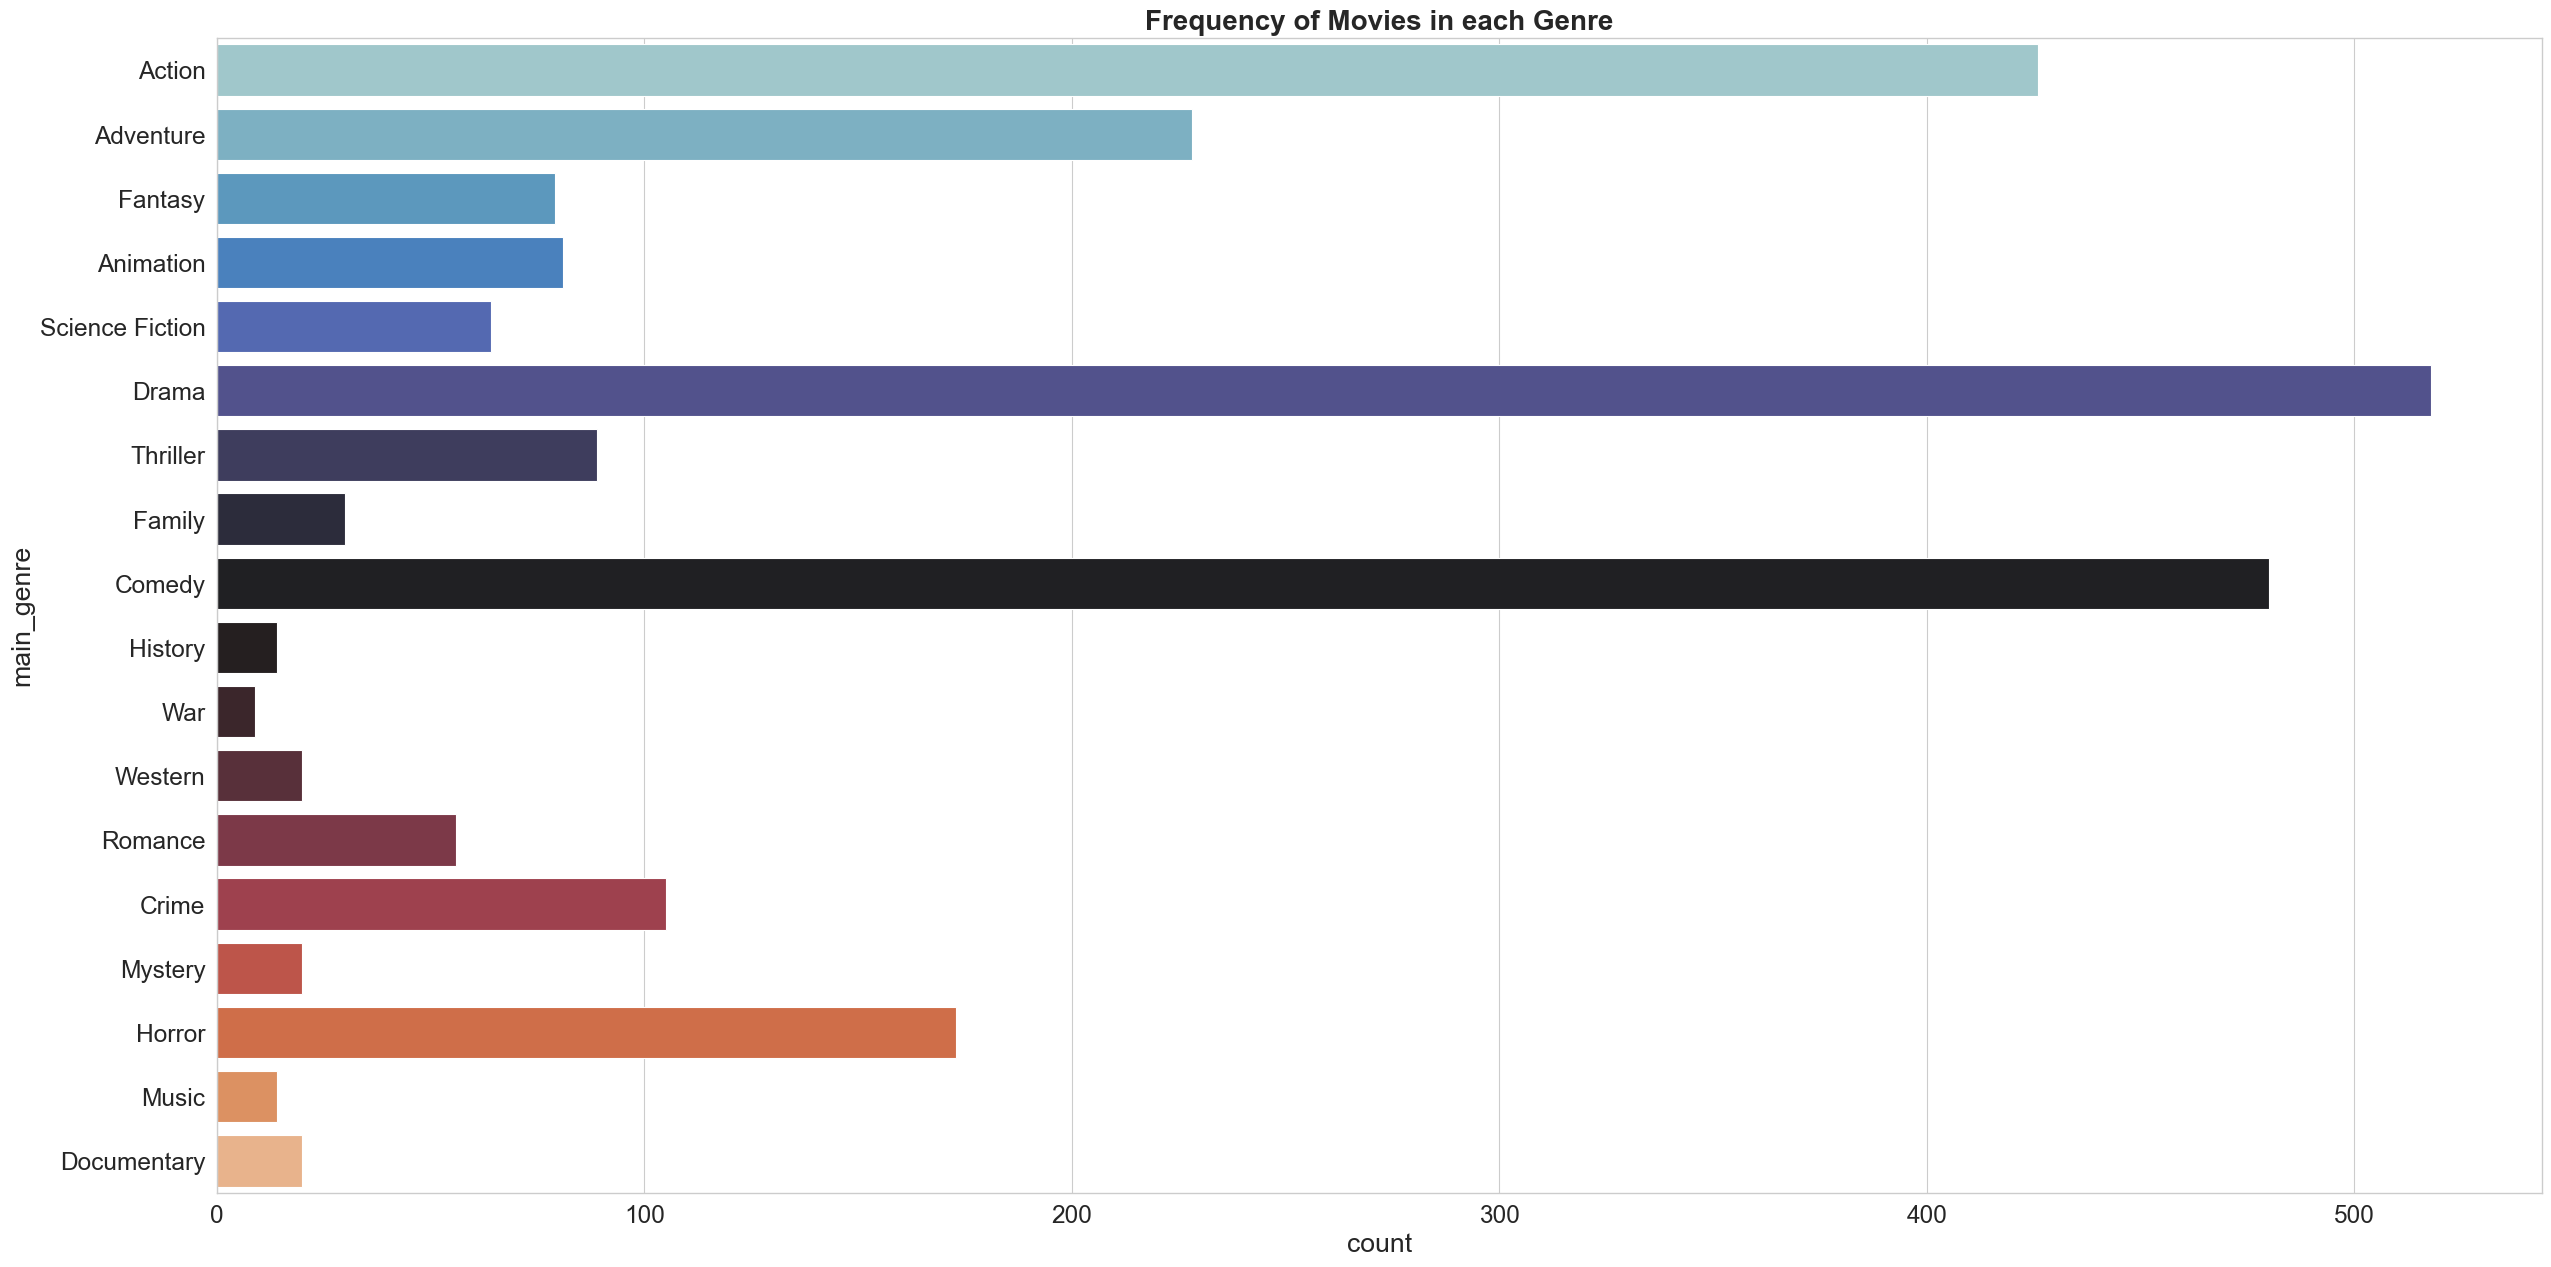

In [214]:
# re-arrange the plot-size
plt.figure(figsize=(30,15))

# set the style for axis and grids to white ----> dark, white, darkgrid, whitegrid
sns.set_style('whitegrid')

# give presentation context via 'paper' ---> paper/talk/poster
sns.set_context('paper', font_scale=2.0)

# The count plot is the ideal bar plot to count the movie frequencies per genre
sns.countplot(movies_df[['main_genre','title']], y='main_genre', orient='h',palette='icefire')

plt.title('Frequency of Movies in each Genre', fontdict={'fontweight': 'bold', 'fontsize': 20})

plt.show()

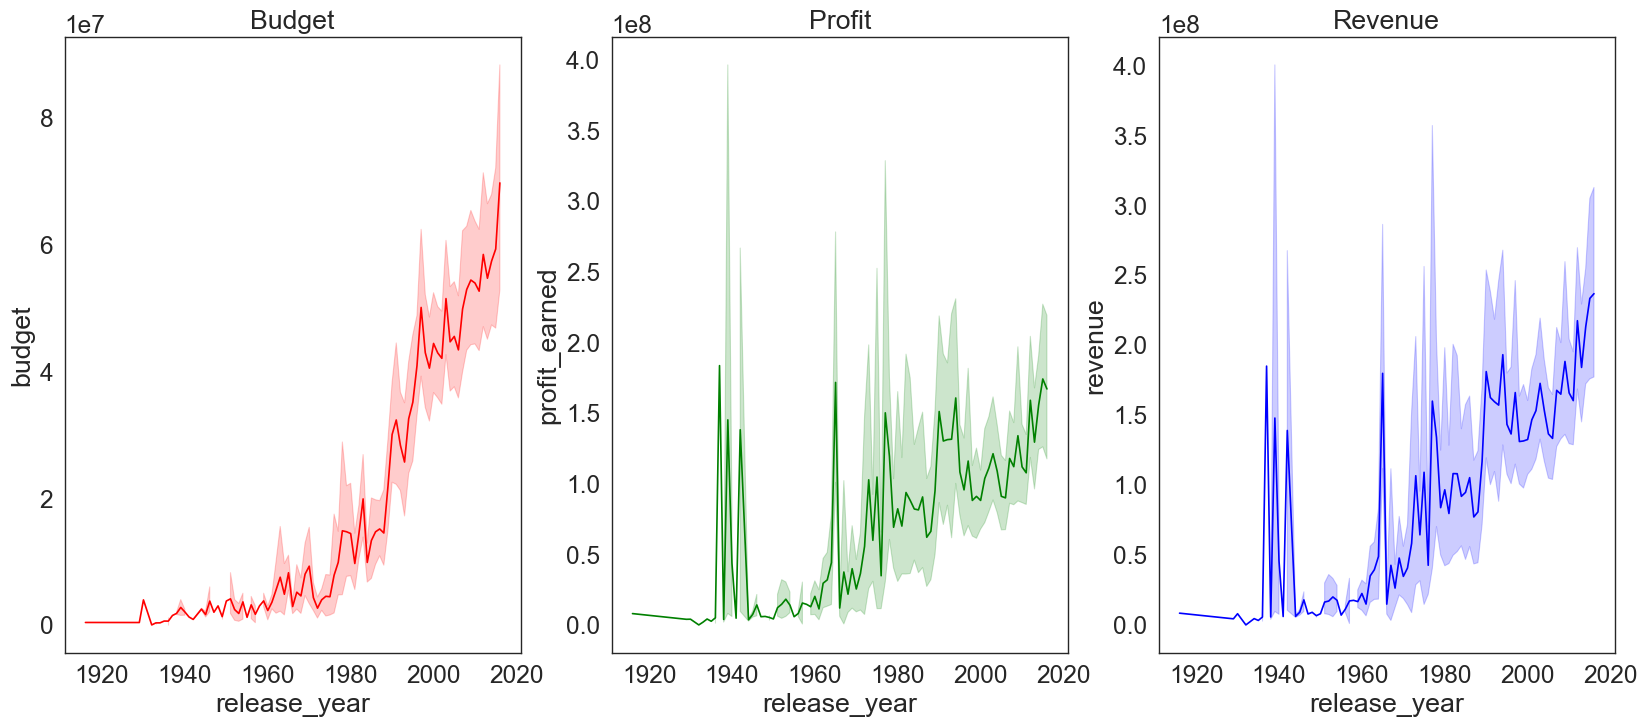

In [219]:
# Visualise some numerical features over the years

# Create figure size
fig =plt.figure(figsize=(20,8))

# set the style for axis and grids to white ----> dark, white, darkgrid, whitegrid
sns.set_style('white')

# give presentation context via 'paper' ---> paper/talk/poster
sns.set_context('paper', font_scale=2.0)

ax0 = plt.subplot(1,3,1)
ax1 = plt.subplot(1,3,2)
ax2 = plt.subplot(1,3,3)

sns.lineplot(data=movies_df, x='release_year', y='budget', color='red', ax=ax0)
ax0.set_title("Budget")

sns.lineplot(data=movies_df, x='release_year', y='profit_earned', color='green', ax=ax1)
ax1.set_title("Profit")

sns.lineplot(data=movies_df, x='release_year', y='revenue', color='blue', ax=ax2)
ax2.set_title("Revenue")

plt.show()

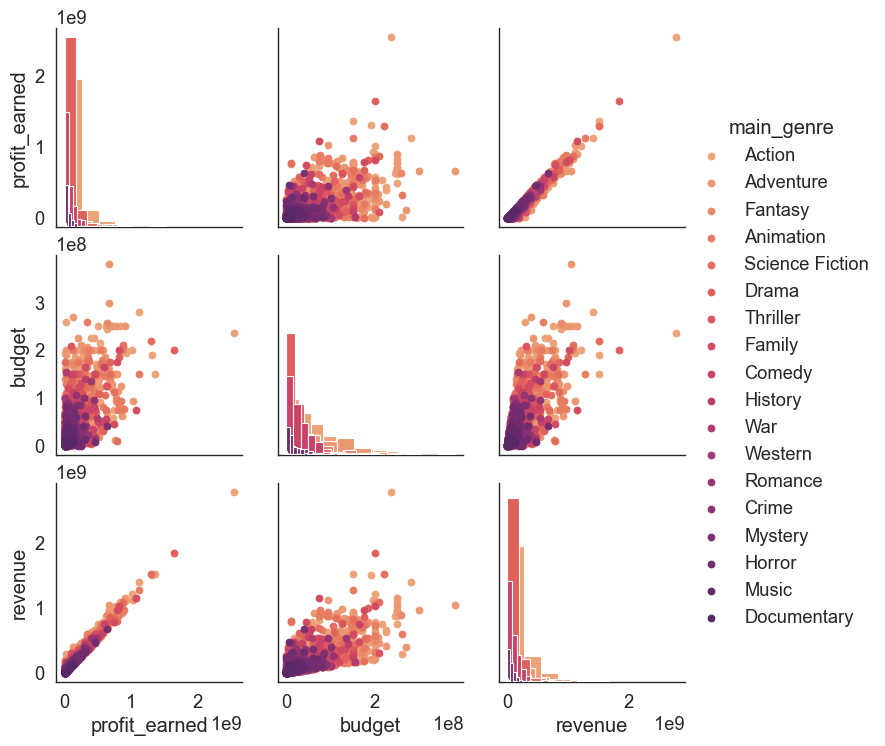

In [247]:
# Generate as pair grid of some of the numerical features

# give presentation context via 'paper' ---> paper/talk/poster
sns.set_context('paper', font_scale=1.5)

# create a sub dataframe for profit_earned, revenue, budget
movies_subset = movies_df[['profit_earned','budget','revenue','main_genre','main_country']]

# Make agrid system from this subset
movies_grid = sns.PairGrid(movies_subset, hue='main_genre', palette='flare')

# Scatter plot across the upper lower and diagonal
movies_grid.map_diag(plt.hist)
movies_grid.map_offdiag(plt.scatter)
movies_grid.add_legend()

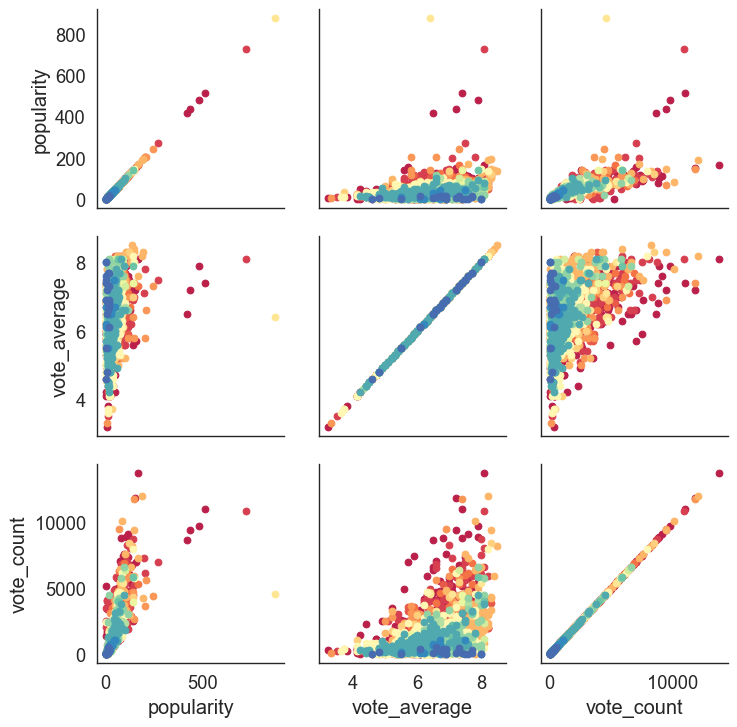

In [257]:
# Generate as pair grid of some of the numerical categories

# give presentation context via 'paper' ---> paper/talk/poster
sns.set_context('paper', font_scale=1.5)

# create a sub dataframe for profit_earned, revenue, budget
movies_vote = movies_df[['popularity','vote_average','vote_count','main_genre','main_country']]

# Make agrid system from this subset
movies_grid2 = sns.PairGrid(movies_vote, hue='main_genre', palette="Spectral")

# Scatter plot across the upper lower and diagonal
movies_grid2.map(plt.scatter)